# Overshooting heatmaps for the obs climo


In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmcrameri.cm as cmc
import tol_colors as tc

from matplotlib.gridspec import GridSpec


In [2]:
freq_dir = "/work/bb1153/b380887/big_obs_climo/os_frequencies/"
save_dir = "/home/b/b380887/cold-point-overshoot/plots/obs_paper/paper_figs/"


In [3]:
years_str = "2007-2010"
season_list = ["DJF", "JJA"]


In [4]:
# coordinates for the region boxes for the map

ecp_coords = [-150, -100, 0, 15]
wpc_coords = [130, 180, 0, 15]
afr_coords = [-7, 35, 0, 18]
ioe_coords = [53, 95, -12, 6]
amz_coords = [-72, -47, -30, 0]
spc_coords = [165, -145, -20, -5]
ios_coords = [50, 100, -15, 0]


In [5]:
region_dict = {}
coords_dict = {}
width_dict = {}
height_dict = {}


In [6]:
region_dict["DJF"] = ["AMZ", "SPC1", "SPC2", "ECP", "IOS"]
coords_dict["DJF"] = {
    "AMZ": amz_coords, 
    "SPC": spc_coords, 
    "IOS": ios_coords, 
    "ECP": ecp_coords
}
width_dict["DJF"] = dict(zip(coords_dict["DJF"].keys(), [25, 50, 50, 50]))
height_dict["DJF"] = dict(zip(coords_dict["DJF"].keys(), [30, 15, 15, 15]))

region_dict["JJA"] = ["AFR", "WPC", "IOE", "ECP"]
coords_dict["JJA"] = {
    "AFR": afr_coords, 
    "WPC": wpc_coords, 
    "IOE": ioe_coords, 
    "ECP": ecp_coords
}
width_dict["JJA"] = dict(zip(region_dict["JJA"], [42, 50, 42, 50]))
height_dict["JJA"] = dict(zip(region_dict["JJA"], [18, 15, 18, 15]))


In [7]:
# 6 degrees above/below, centered otherwise (except for land)
xy_dict = {}
xy_dict["DJF"] = {
    "AMZ": (-59.5, 6), 
    # "AMZ": (-86, -20), # adjusted
    "SPC": (-170, 1),
    "IOS": (75, -22),
    "ECP": (-125, 21)
}
xy_dict["JJA"] = {
    "AFR": (14, 24),
    # "AFR": (-20, 9), # adjusted
    "WPC": (155, 21),
    "IOE": (74, -20),
    "ECP": (-125, 21)
}

### Read in the frequencies

In [8]:
os_freqs_dict_list = [[]]*len(season_list)

for i, season in enumerate(season_list):
    os_freqs_dict = {}
    # os_freqs_dict_m2 = {}
    # os_freqs_dict_m4 = {}
    region_list = region_dict[season]
    # if season == "DJF":
    #     region_list = ["AMZ", "SPC", "IOS", "ECP", "SPC1", "SPC2"]
    # elif season == "JJA":
    #     region_list = ["AFR", "WPC", "IOE", "ECP"]
    
    for region in region_list:
        os_freqs_dict[region] = xr.open_dataset(freq_dir + "os_freq_Tb_below_cpT_{s}{y}_{r}.nc".format(s=season, y=years_str, r=region))["os_freqs"]
        # os_freqs_dict_m2[region] = xr.open_dataset(freq_dir + "os_freq_Tb_below_cpT-2K_{s}{y}_{r}.nc".format(s=season, y=years_str, r=region))["os_freqs"]
        # os_freqs_dict_m4[region] = xr.open_dataset(freq_dir + "os_freq_Tb_below_cpT-4K_{s}{y}_{r}.nc".format(s=season, y=years_str, r=region))["os_freqs"]

    print(season, "mean frequencies:")
    for key in list(os_freqs_dict.keys()):
    # for key in list(os_freqs_dict_m2.keys()):
        if key == "SPC1":
            freqs = xr.concat([os_freqs_dict["SPC1"], os_freqs_dict["SPC2"]], dim="time")
            # freqs_m2 = xr.concat([os_freqs_dict_m2["SPC1"], os_freqs_dict_m2["SPC2"]], dim="time")
            # freqs_m4 = xr.concat([os_freqs_dict_m4["SPC1"], os_freqs_dict_m4["SPC2"]], dim="time")
            print("SPC*", "{}%".format(np.round(freqs.mean().values*100., 5)))
            # mean_m2 = "{}%".format(np.round(freqs_m2.mean().values*100., 5))
            # mean_m4 = "{}%".format(np.round(freqs_m4.mean().values*100., 5))
            # print("SPC*", mean_m2, mean_m4)
        elif key == "SPC2":
            pass
        else:
            print(key, "{}%".format(np.round(os_freqs_dict[key].mean().values*100., 5)))
            # mean_0 = "{}%".format(np.round(os_freqs_dict[key].mean().values*100., 5))
            # mean_m2 = "{}%".format(np.round(os_freqs_dict_m2[key].mean().values*100., 5))
            # mean_m4 = "{}%".format(np.round(os_freqs_dict_m4[key].mean().values*100., 5))
            # print(key, mean_0, mean_m2, mean_m4)
    print("\n")
    
    os_freqs_dict_list[i] = os_freqs_dict
    # os_freqs_m2_dict_list[i] = os_freqs_dict_m2
    # os_freqs_m4_dict_list[i] = os_freqs_dict_m4
    

DJF mean frequencies:
AMZ 0.01076%
SPC* 0.00812%
ECP 0.00044%
IOS 0.00604%


JJA mean frequencies:
AFR 0.04515%
WPC 0.03166%
IOE 0.01594%
ECP 0.01416%




In [9]:
os_freqs_dict_list = [[]]*len(season_list)
os_freqs_m2_dict_list = [[]]*len(season_list)
os_freqs_m4_dict_list = [[]]*len(season_list)

for i, season in enumerate(season_list):
    os_freqs_dict = {}
    os_freqs_dict_m2 = {}
    os_freqs_dict_m4 = {}
    # region_list = region_dict[season]
    region_list = ["AMZ", "SPC", "IOS", "ECP", "SPC1", "SPC2"]
    
    for region in region_list:
        os_freqs_dict[region] = xr.open_dataset(freq_dir + "os_freq_Tb_below_cpT_{s}{y}_{r}.nc".format(s=season, y=years_str, r=region))["os_freqs"]
        os_freqs_dict_m2[region] = xr.open_dataset(freq_dir + "os_freq_Tb_below_cpT-2K_{s}{y}_{r}.nc".format(s=season, y=years_str, r=region))["os_freqs"]
        os_freqs_dict_m4[region] = xr.open_dataset(freq_dir + "os_freq_Tb_below_cpT-4K_{s}{y}_{r}.nc".format(s=season, y=years_str, r=region))["os_freqs"]

    print(season, "mean frequencies:")
    # for key in list(os_freqs_dict.keys()):
    for key in list(os_freqs_dict_m2.keys()):
        if key == "SPC1":
            # freqs = xr.concat([os_freqs_dict["SPC1"], os_freqs_dict["SPC2"]], dim="time")
            freqs_m2 = xr.concat([os_freqs_dict_m2["SPC1"], os_freqs_dict_m2["SPC2"]], dim="time")
            freqs_m4 = xr.concat([os_freqs_dict_m4["SPC1"], os_freqs_dict_m4["SPC2"]], dim="time")
            # print("SPC*", "{}%".format(np.round(freqs.mean().values*100., 5)))
            mean_m2 = "{}%".format(np.round(freqs_m2.mean().values*100., 5))
            mean_m4 = "{}%".format(np.round(freqs_m4.mean().values*100., 5))
            print("SPC*", mean_m2, mean_m4)
        elif key == "SPC2":
            pass
        else:
            # print(key, "{}%".format(np.round(os_freqs_dict[key].mean().values*100., 5)))
            mean_0 = "{}%".format(np.round(os_freqs_dict[key].mean().values*100., 5))
            mean_m2 = "{}%".format(np.round(os_freqs_dict_m2[key].mean().values*100., 5))
            mean_m4 = "{}%".format(np.round(os_freqs_dict_m4[key].mean().values*100., 5))
            print(key, mean_0, mean_m2, mean_m4)
    print("\n")
    
    os_freqs_dict_list[i] = os_freqs_dict
    os_freqs_m2_dict_list[i] = os_freqs_dict_m2
    os_freqs_m4_dict_list[i] = os_freqs_dict_m4


DJF mean frequencies:
AMZ 0.01076% 0.00367% 0.00134%
SPC 0.00812% 0.00297% 0.00149%
IOS 0.00604% 0.00168% 0.00049%
ECP 0.00044% 0.00012% 4e-05%
SPC* 0.00297% 0.00149%




FileNotFoundError: [Errno 2] No such file or directory: b'/work/bb1153/b380887/big_obs_climo/os_frequencies/os_freq_Tb_below_cpT_JJA2007-2010_AMZ.nc'

In [14]:
def compare_two_regions(r1, r2, season, dict_list=os_freqs_dict_list, m=0):
    if season == "DJF":
        freqs = dict_list[0]
    elif season == "JJA":
        freqs = dict_list[1]
        
    if r1 == "SPC":
        if m == 0:
            freqs1 = xr.open_dataset(freq_dir + "os_freq_Tb_below_cpT_{s}{y}_SPC.nc".format(s=season, y=years_str))["os_freqs"]
        else:
            freqs1 = xr.open_dataset(freq_dir + "os_freq_Tb_below_cpT-{m}K_{s}{y}_SPC.nc".format(s=season, y=years_str, m=m))["os_freqs"]
    else:
        freqs1 = freqs[r1]
    
    if r2 == "SPC": 
        if m == 0:
            freqs2 = xr.open_dataset(freq_dir + "os_freq_Tb_below_cpT_{s}{y}_SPC.nc".format(s=season, y=years_str))["os_freqs"]
        else:
            freqs2 = xr.open_dataset(freq_dir + "os_freq_Tb_below_cpT-{m}K_{s}{y}_SPC.nc".format(s=season, y=years_str, m=m))["os_freqs"]

    else:
        freqs2 = freqs[r2]
        
    print(freqs1.mean().values/freqs2.mean().values)
    

#### Within each season for Tb < Tcp

In [13]:
compare_two_regions("AMZ", "SPC", "DJF")
compare_two_regions("AMZ", "IOS", "DJF")
compare_two_regions("AMZ", "ECP", "DJF")
compare_two_regions("SPC", "IOS", "DJF")

1.325756370781175
1.7824635677086003
24.362551209951636
1.3444880273577864


In [11]:
compare_two_regions("AFR", "WPC", "JJA")
compare_two_regions("AFR", "IOE", "JJA")
compare_two_regions("AFR", "ECP", "JJA")
compare_two_regions("WPC", "IOE", "JJA")

1.4262050657868988
2.8318717247581158
3.188112768181545
1.9855992610681483


#### Within each season for Tb < (Tcp - 2K)

In [15]:
compare_two_regions("AMZ", "SPC", "DJF", dict_list=os_freqs_m2_dict_list, m=2)
compare_two_regions("AMZ", "IOS", "DJF", dict_list=os_freqs_m2_dict_list, m=2)
compare_two_regions("AMZ", "ECP", "DJF", dict_list=os_freqs_m2_dict_list, m=2)
compare_two_regions("SPC", "IOS", "DJF", dict_list=os_freqs_m2_dict_list, m=2)


1.2342028354147154
2.1862812546342494
30.639215864620812
1.771411628542903


In [16]:
compare_two_regions("AFR", "WPC", "JJA", dict_list=os_freqs_m2_dict_list, m=2)
compare_two_regions("AFR", "IOE", "JJA", dict_list=os_freqs_m2_dict_list, m=2)
compare_two_regions("AFR", "ECP", "JJA", dict_list=os_freqs_m2_dict_list, m=2)
compare_two_regions("WPC", "IOE", "JJA", dict_list=os_freqs_m2_dict_list, m=2)


1.3236560502910388
1.8743836368763234
1.9262632339751646
1.4160654774812484


#### Within each season for Tb < (Tcp - 4K)

In [17]:
compare_two_regions("AMZ", "SPC", "DJF", dict_list=os_freqs_m4_dict_list, m=4)
compare_two_regions("AMZ", "IOS", "DJF", dict_list=os_freqs_m4_dict_list, m=4)
compare_two_regions("AMZ", "ECP", "DJF", dict_list=os_freqs_m4_dict_list, m=4)
compare_two_regions("SPC", "IOS", "DJF", dict_list=os_freqs_m4_dict_list, m=4)


0.898631313317986
2.7641760223239835
36.32705732825623
3.075984534878837


In [18]:
compare_two_regions("AFR", "WPC", "JJA", dict_list=os_freqs_m4_dict_list, m=4)
compare_two_regions("AFR", "IOE", "JJA", dict_list=os_freqs_m4_dict_list, m=4)
compare_two_regions("AFR", "ECP", "JJA", dict_list=os_freqs_m4_dict_list, m=4)
compare_two_regions("WPC", "IOE", "JJA", dict_list=os_freqs_m4_dict_list, m=4)


1.1198796824175274
1.269021191634063
1.2805792924997035
1.133176368460028


## Plot

In [12]:
def plot_Tb_heatmap_cp(os_freqs_dict_list, season_list, coords_dict, years_str, cmap="Spectral_r", save_dir=save_dir,
                    mask_min=True, fsize=16, tsize=24, labsize=14, vmin=0, vmax=5, vint=0.5, figsize=(17, 8), levels=None,
                    central_lon=80, save=False, annotate_regions=False):
    """Plot the heatmap after it's been calculated
    """
    plot_lons = [*np.arange(-100, 181, 40), *np.arange(-140, -99, 40)]
    plot_lats = np.arange(-30, 31, 15)
    
    # hardcode
    if levels is None:
        levels = np.arange(vmin, vmax+vint/2, vint)
            
    fig = plt.figure(figsize=figsize)
    gs = GridSpec(5, 6, height_ratios=[0.1, 1, 0.1, 1, 0.15], hspace=0.3, wspace=0.4)
    ax_cp1 = plt.subplot(gs[1, :], projection=ccrs.PlateCarree(central_longitude=central_lon))
    ax_cp2 = plt.subplot(gs[3, :], projection=ccrs.PlateCarree(central_longitude=central_lon))
    ax_cp_list = [ax_cp1, ax_cp2]
    
    ax_cb_cp = plt.subplot(gs[4, 1:5])
    ax_title_1 = plt.subplot(gs[0, :])
    ax_title_2 = plt.subplot(gs[2, :])

    
    for i, season in enumerate(season_list):
        os_cp_freqs_dict = os_freqs_dict_list[i]
        ax_cp = ax_cp_list[i]
        coords_dict_season = coords_dict[season]
        width_dict_season = width_dict[season]
        height_dict_season = height_dict[season]

        for region in os_cp_freqs_dict.keys():
            os_cp_freqs = os_cp_freqs_dict[region]
            if mask_min:
                plot_pct_cp = os_cp_freqs.where(os_cp_freqs >= vmin/100.).values*100.
            else:
                plot_pct_cp = os_cp_freqs.values*100. 
            
            # -central_lon is an artifical offset to get the plotting longitudes aligned correctly with cartopy & pcolormesh
            cf1 = ax_cp.contourf(os_cp_freqs.lon-central_lon, os_cp_freqs.lat, plot_pct_cp, cmap=cmap, 
                                 levels=levels)#, norm=mcolors.LogNorm(vmin=vmin, vmax=vmax))
           
            # add region borders
            if region == "SPC2":
                coords = coords_dict_season["SPC"]
                width = width_dict_season["SPC"]
                height = height_dict_season["SPC"]
            elif region == "SPC1":
                coords = None
                width = None
                height = None
            else:
                coords = coords_dict_season[region]
                width = width_dict_season[region]
                height = height_dict_season[region]
            if region != "SPC1":
                ax_cp.add_patch(mpatches.Rectangle(xy=[coords[0], coords[2]], 
                                                width=width, 
                                                height=height,
                                                fill=False, color='k', linewidth=4,
                                                transform=ccrs.PlateCarree()
                                               ))        

    # gridlines
    for ax in ax_cp_list:
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                            xlocs=plot_lons, ylocs=plot_lats, x_inline=False, y_inline=False, color = "None")
        gl.top_labels = False
        gl.right_labels = False
        gl.xlabel_style = {'size': labsize, 'rotation': 0}#20}
        gl.ylabel_style = {'size': labsize}
        ax.add_feature(cfeature.COASTLINE)
        ax.set_ylim((plot_lats[0], plot_lats[-1]))

    # colorbar
    cbar_cp = plt.colorbar(cf1, cax=ax_cb_cp, orientation="horizontal", extend="max")
    cbar_cp.set_label("Pointwise frequency of cold point overshoots (%)", fontsize=fsize)
    cbar_cp.ax.tick_params(labelsize=labsize)
    
    # titles
    ax_title_1.axis("off")
    ax_title_1.text(x=0.5, y=0, s="{s} {y}".format(s=season_list[0], y=years_str.replace("-", "—")), verticalalignment="center_baseline",
                  horizontalalignment="center", fontsize=tsize+5
                  )
    ax_title_2.axis("off")
    ax_title_2.text(x=0.5, y=0, s="{s} {y}".format(s=season_list[1], y=years_str.replace("-", "—")), verticalalignment="center_baseline",
                  horizontalalignment="center", fontsize=tsize+5
                  )
        
    
    # annotate region labels
    if annotate_regions:
        transform_1 = ccrs.PlateCarree()._as_mpl_transform(ax_cp1)
        transform_2 = ccrs.PlateCarree()._as_mpl_transform(ax_cp2)
        for region in xy_dict["DJF"].keys():
            ax_cp1.annotate(region, xy_dict["DJF"][region], xycoords=transform_1,
                          ha="center", va="center", fontsize=tsize, weight="bold")        
        for region in xy_dict["JJA"].keys():
            ax_cp2.annotate(region, xy_dict["JJA"][region], xycoords=transform_2,
                          ha="center", va="center", fontsize=tsize, weight="bold") 


    if save:
        if annotate_regions:
            fig_name = save_dir + "os_heatmaps_Tb_less_cp_only__annotated_regions.png"
        else:
            fig_name = save_dir + "os_heatmaps_Tb_less_cp_only.png"
            
        print("saved to", fig_name)
        plt.savefig(fig_name, bbox_inches="tight", dpi=300)

    plt.show()


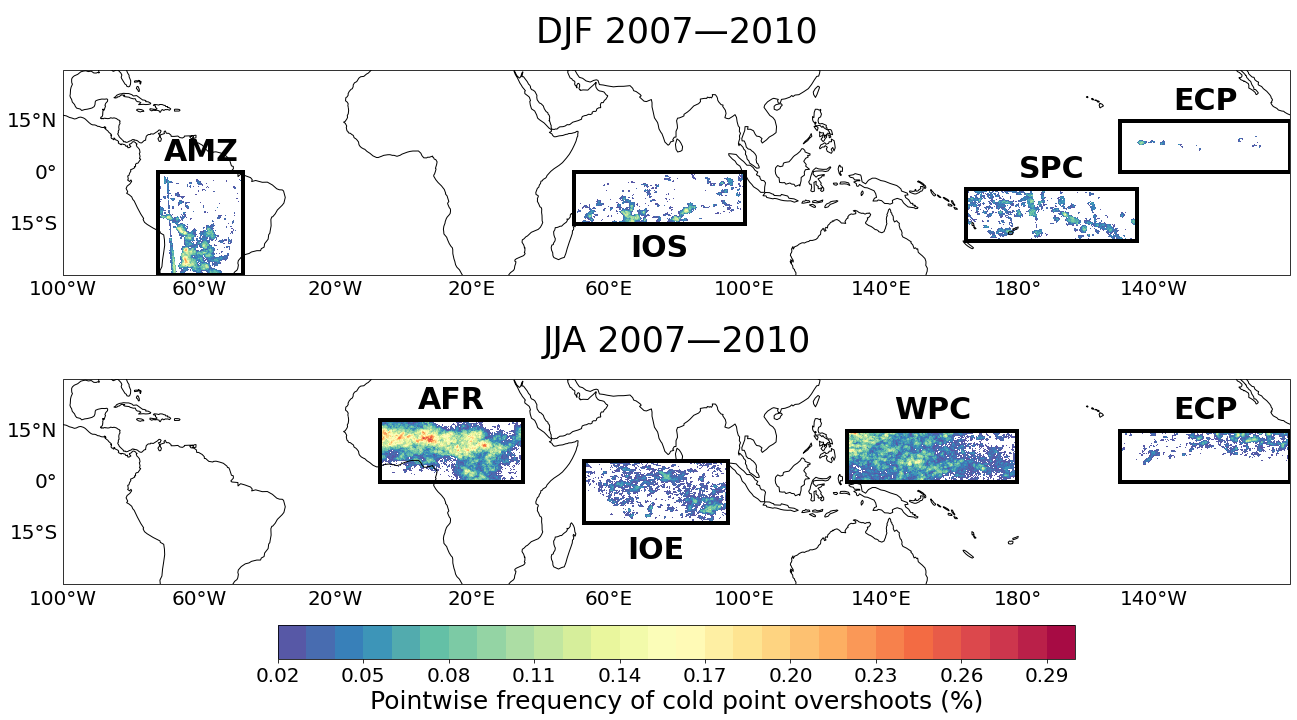

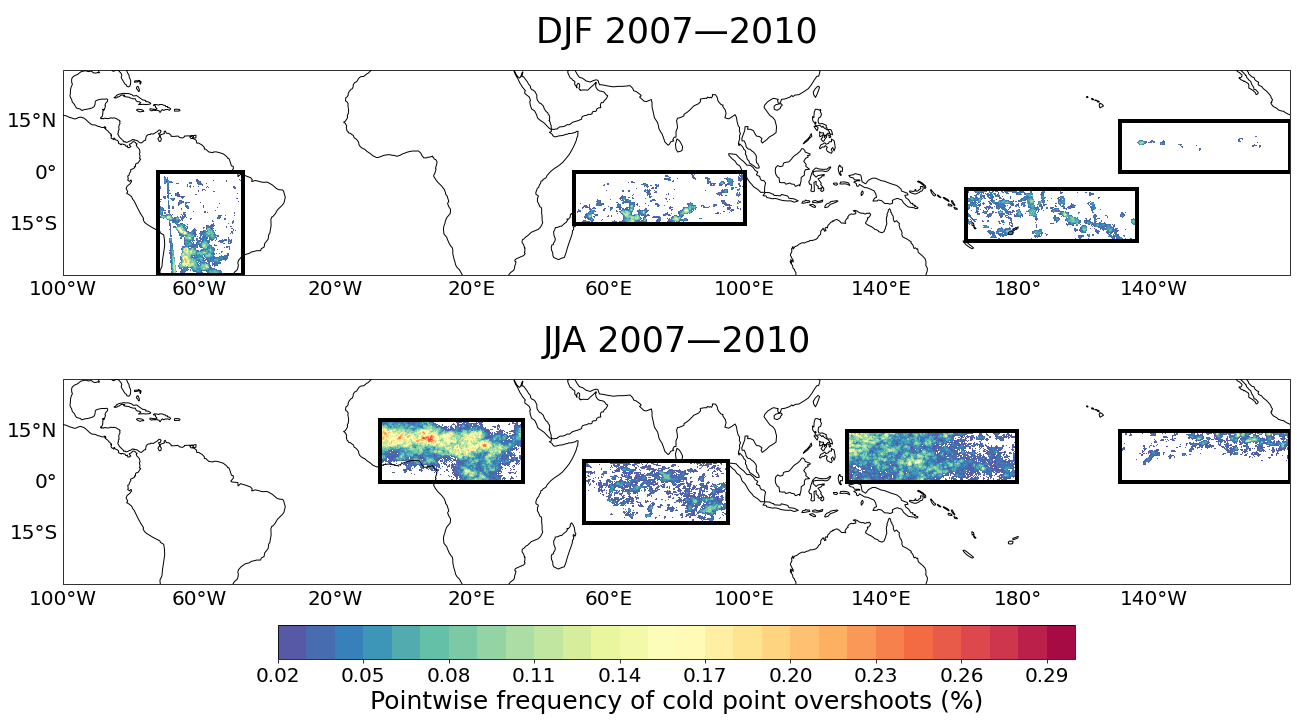

CPU times: user 29.8 s, sys: 1.58 s, total: 31.3 s
Wall time: 29.6 s


In [10]:
%%time

plot_Tb_heatmap_cp(os_freqs_dict_list, season_list, coords_dict, years_str, cmap="Spectral_r", 
                   fsize=25, tsize=30, labsize=20, mask_min=True, vmin=0.02, vmax=0.305, vint=0.01,
                   levels=None, figsize=(22, 12), annotate_regions=True, save=False)

plot_Tb_heatmap_cp(os_freqs_dict_list, season_list, coords_dict, years_str, cmap="Spectral_r", 
                   fsize=25, tsize=30, labsize=20, mask_min=True, vmin=0.02, vmax=0.305, vint=0.01,
                   levels=None, figsize=(22, 12), annotate_regions=False, save=False)


saved to /home/b/b380887/cold-point-overshoot/plots/obs_paper/paper_figs/os_heatmaps_Tb_less_cp_only__annotated_regions.png


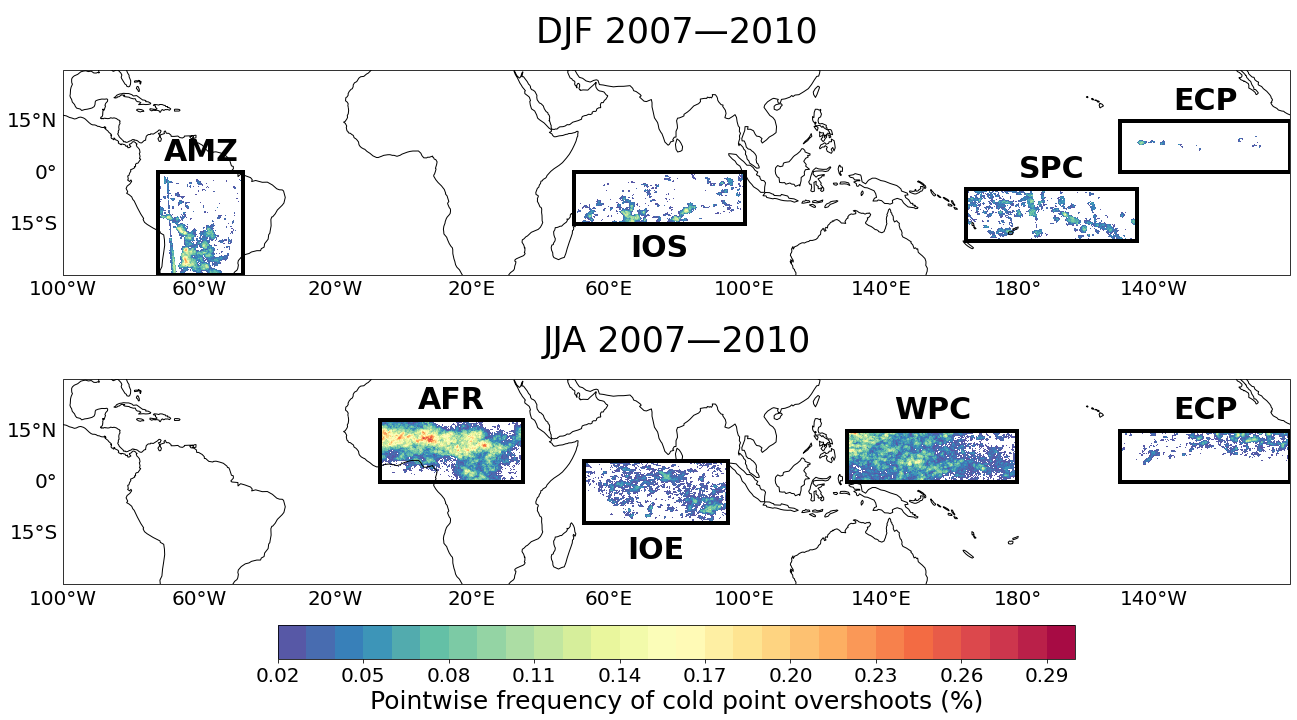

saved to /home/b/b380887/cold-point-overshoot/plots/obs_paper/paper_figs/os_heatmaps_Tb_less_cp_only.png


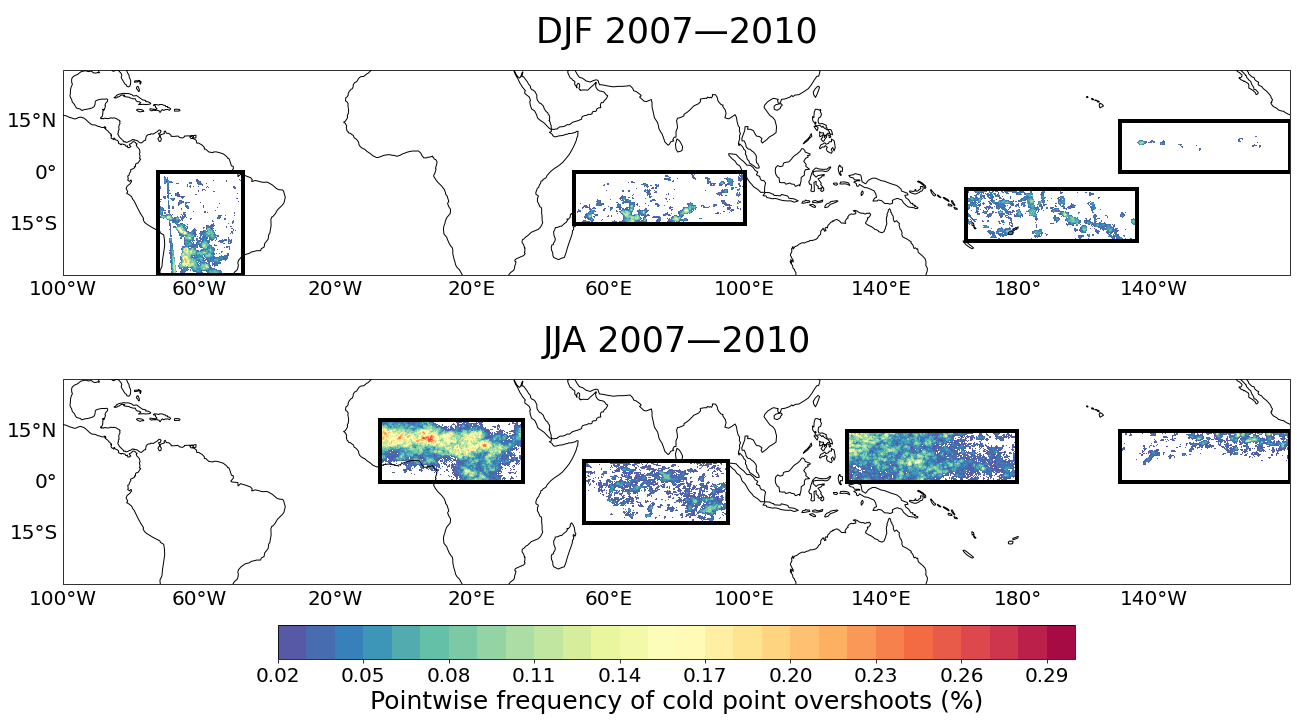

CPU times: user 58.2 s, sys: 3.48 s, total: 1min 1s
Wall time: 57.9 s


In [52]:
%%time

plot_Tb_heatmap_cp(os_freqs_dict_list, season_list, coords_dict, years_str, cmap="Spectral_r", 
                   fsize=25, tsize=30, labsize=20, mask_min=True, vmin=0.02, vmax=0.305, vint=0.01,
                   levels=None, figsize=(22, 12), annotate_regions=True, save=True)

plot_Tb_heatmap_cp(os_freqs_dict_list, season_list, coords_dict, years_str, cmap="Spectral_r", 
                   fsize=25, tsize=30, labsize=20, mask_min=True, vmin=0.02, vmax=0.305, vint=0.01,
                   levels=None, figsize=(22, 12), annotate_regions=False, save=True)
